In [38]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
# import sarchl
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
single_data = pd.read_csv('./realtime_single.csv',index_col=0)
data = pd.concat([single_data,pd.read_csv('./realtime_unlimited.csv',index_col=0)])
data

Benchmark       0       1        2          resources
0       ATAX    6.67  393.42   600.95      single thread
1         BS   82.59  369.78   645.95      single thread
2        FWT   83.36  845.34  1157.63      single thread
3        FIR   64.77  304.03   474.24      single thread
4        FLW  137.31  549.19   965.12      single thread
5         KM   40.14  613.39   940.24      single thread
6         MM  223.98  753.98  1032.63      single thread
7         MT   10.32  351.88   475.22      single thread
8         PR  496.70  251.53   392.61      single thread
9       ReLU    0.00  449.76   636.92      single thread
10      SPMV    7.22  686.37  1018.36      single thread
0       ATAX    6.48  377.95   739.52  unlimited threads
1         BS   89.50  352.96   369.31  unlimited threads
2        FWT   83.42  782.78   467.04  unlimited threads
3        FIR   62.08  292.93   151.94  unlimited threads
4        FLW  150.12  527.15   558.29  unlimited threads
5         KM   37.32  586.11   447.93  unlimited threads
6         MM  207.31  741.56   383.53  unlimited threads
7         MT    9.93  326.36   221.08  unlimited threads
8         PR  459.93  242.50   179.01  unlimited threads
9       ReLU    0.00  422.06   397.95  unlimited threads
10      SPMV    6.69  605.95   424.39  unlimited threads

In [40]:
data = data.melt(id_vars=['Benchmark','resources'],value_vars=['0','1','2'])
data.columns=['Benchmark','resources','settingID','realtime']

In [41]:
data['combination']=data['settingID']+ '+' + data['resources']
data = data[['Benchmark','combination','realtime']]

In [42]:
# data=data.pivot(index='Benchmark',columns='combination',values='realtime')
# data.reset_index(inplace=True)
# data

In [43]:
data

Benchmark          combination  realtime
0       ATAX      0+single thread      6.67
1         BS      0+single thread     82.59
2        FWT      0+single thread     83.36
3        FIR      0+single thread     64.77
4        FLW      0+single thread    137.31
..       ...                  ...       ...
61        MM  2+unlimited threads    383.53
62        MT  2+unlimited threads    221.08
63        PR  2+unlimited threads    179.01
64      ReLU  2+unlimited threads    397.95
65      SPMV  2+unlimited threads    424.39

[66 rows x 3 columns]

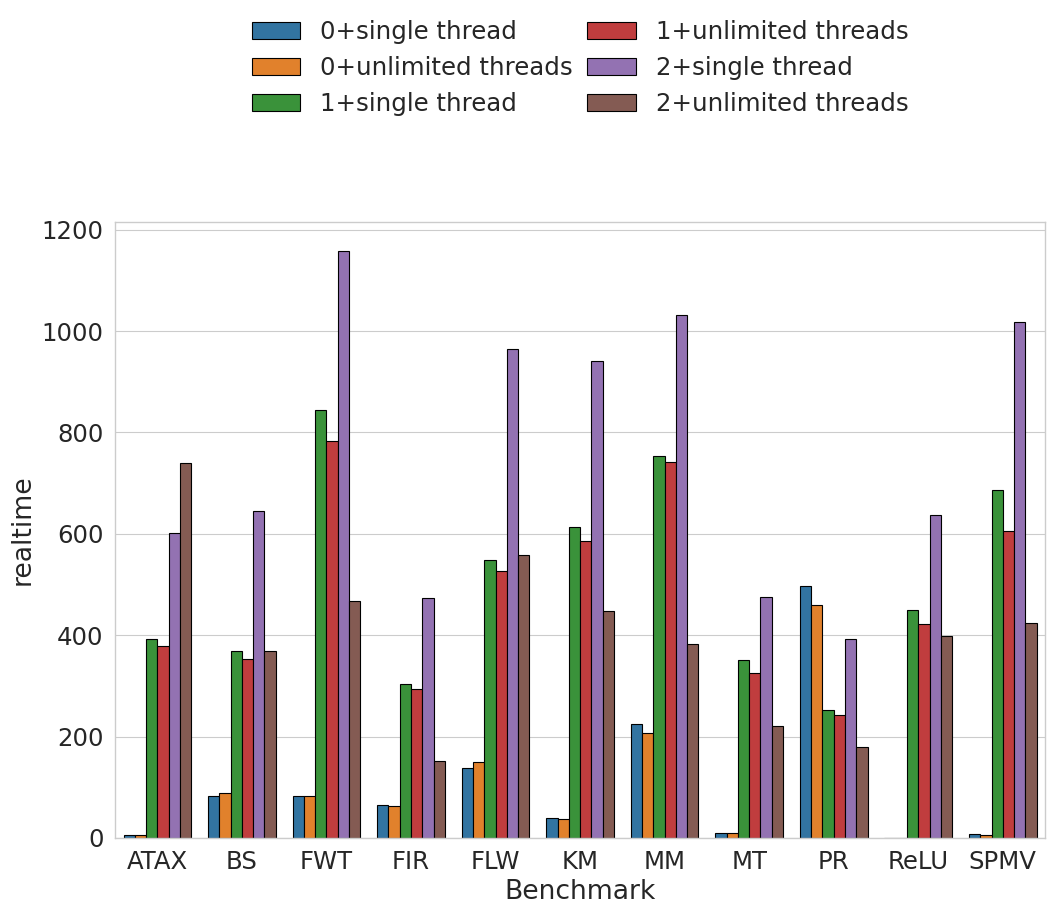

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=data, 
            x='Benchmark', hue='combination', y='realtime', 
         ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.25), loc=10, ncol=2)